
# Diabetes Prediction Using Machine Learning in Python

# Problem Statement

In [ ]:
This is a classification problem of supervised machine learning. 
The objective is to predict whether or not a patient has diabetes, based on 
certain diagnostic measurements included in the dataset.

0 – Absence of Diabetes

1 – Presence of Diabetes

In [2]:
# Import Basic Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# TO load dataset 
df=pd.read_csv('diabeties.csv')

In [4]:
# To show first 5 records
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# To check number of rows and columns
df.shape

(768, 9)

In [6]:
# To check the data types
df.dtypes

pregnant       int64
glocose        int64
bp             int64
skin           int64
insulin        int64
bmi          float64
predigree    float64
age            int64
target         int64
dtype: object

In [7]:
# To check the null value
df.isnull().sum()

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

# There are no missing values in the dataset. The dataset had already been cleaned. 


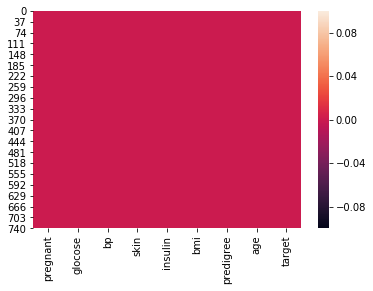

In [8]:
# To visualize the null value
sns.heatmap(df.isnull())
plt.show()

In [9]:
#  the information about data\
df.info

<bound method DataFrame.info of      pregnant  glocose  bp  skin  insulin   bmi  predigree  age  target
0           6      148  72    35        0  33.6      0.627   50       1
1           1       85  66    29        0  26.6      0.351   31       0
2           8      183  64     0        0  23.3      0.672   32       1
3           1       89  66    23       94  28.1      0.167   21       0
4           0      137  40    35      168  43.1      2.288   33       1
..        ...      ...  ..   ...      ...   ...        ...  ...     ...
763        10      101  76    48      180  32.9      0.171   63       0
764         2      122  70    27        0  36.8      0.340   27       0
765         5      121  72    23      112  26.2      0.245   30       0
766         1      126  60     0        0  30.1      0.349   47       1
767         1       93  70    31        0  30.4      0.315   23       0

[768 rows x 9 columns]>

In [10]:
# check data is balance or not
df['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

In [11]:
#Separate input and output from datset
X=df.drop('target',axis=1)# input features
Y=df['target'] # output

# We will now split our dataset before we train it. 
X will contain all the Independent variables while y will have the Dependent variable (Outcome).

In [12]:
# train-Test-split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
# First apply scaling on output data before train and data
#apply standard scaler for input data training and testing
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
# mean apply standard sclaer for X_train data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
# after scaling its becomenp array

In [14]:
# create a function
def create_model(model):
    model.fit(X_train,Y_train) # train the model
    Y_pred=model.predict(X_test)# test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. Using Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression 

In [17]:
# Create class of Logistic Regression
lr=LogisticRegression(random_state=1)
lr=create_model(lr)


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

[[132  14]
 [ 36  49]]


# 2.Using decision Tree

In [18]:
#apply Decision treeclassifier class
# mean given dataset into DecisionTreeclassification algorithm
#perform dataset ith the help of desicionTreeClassification
#call DecisionTreeClassification class
from sklearn.tree import DecisionTreeClassifier

In [19]:
##Create the object of decision Tree classifier class
dt=DecisionTreeClassifier(random_state=1) # By default use method gini index
#means formula : 1- P(yes)^2-Q(no)^2 : find impurities of each input features

In [20]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[117  29]
 [ 42  43]]


In [21]:
##But we got less score 0.51 % its not good ,
#region behind less score , overfit means
#model is overfit so reduced the overfitting situation : -
#then we use pruning technique
#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf : inbuilt parameter

In [22]:
#max_depth: # note : max_depth can not more than 8
#1. max_depth parameter
# create object of DecisionTreeClassifierclass and passing the parameter
#max_depth

In [23]:
# create the object decisionTreeClassifier and pass the max_depth parameter
dt1=DecisionTreeClassifier(random_state=1,max_depth=5) # by default gini index

In [24]:
# call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

[[122  24]
 [ 30  55]]


In [25]:
# min_samples_leaf
#2nd puring technique : min)samples_leaf
# create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=91) # by deafault hini index
# min_samples_leaf=50 or more means not leass than 50 can be more than 50

In [26]:
#call function
dt2=create_model(dt2)


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]


# Tree Tree using Entropy 

In [28]:
# Create object
dte = DecisionTreeClassifier(random_state=1,criterion = 'entropy')


In [30]:
# call function
dte=create_model(dte)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       146
           1       0.64      0.66      0.65        85

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

[[114  32]
 [ 29  56]]


In [31]:
#Decision Tree max_depth
dte1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=7)


In [32]:
# call function
dte1=create_model(dte1)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       146
           1       0.68      0.74      0.71        85

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231

[[116  30]
 [ 22  63]]


In [33]:
#Decision Tree min_samples_leaf
dte2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=100)

In [34]:
# call function
dte2 = create_model(dte2)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       146
           1       0.67      0.69      0.68        85

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.76      0.76      0.76       231

[[117  29]
 [ 26  59]]


# Using BoostingTechnics

# 1.ADA Boosting ( Adaptor Boosting )

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada = AdaBoostClassifier(n_estimators=90,random_state=1)

In [37]:
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.77      0.66      0.71        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231

[[129  17]
 [ 29  56]]


# 2.Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state=1)

In [40]:
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.77      0.66      0.71        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231

[[129  17]
 [ 29  56]]


In [27]:
#Apply Support vector machine : -
#use SVM : support vector machine : - classification algorithm
#There are 3 types of SVM (Kernel function) : -
#1. Linear kernel function of SVM : means suppose data are linearly
#separatable with the help of straight line ,it is known as decision boundary
#or hyperplane
#call class LinearSVC inbuilt class
#SVC : support vector classifier

In [42]:
from sklearn.svm import LinearSVC

In [43]:
#create a object of LinearSVC class
svc=LinearSVC(random_state=1) # hard margin

In [44]:
# call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

[[132  14]
 [ 36  49]]


# Conclusion

# We have used 11 different methods the Best result we got is in Decision Tree Entropy max_depth .74 i.e. 74%